EXERCICI 1    EXERCICI 2    EXERCICI 3

*Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.
*Treu les stopwords i realitza stemming al teu conjunt de dades.
*Realitza sentiment analysis al teu conjunt de dades.

In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


He cogido como texto un libro con el título "influence"

In [8]:
df = pd.read_csv('C:\\Users\\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\09-SENTIMENT I TEXTOS\\Influence.txt', delimiter='\t')
df.head(20)


,INTRODUCTION
0,I can admit it freely now. All my life I’ve be...
1,"can recall, I’ve been an easy mark for the pit..."
2,"raisers, and operators of one sort or another...."
3,people have had dishonorable motives. The othe...
4,"certain charitable agencies, for instance—have..."
5,No matter. With personally disquieting frequen...
6,myself in possession of unwanted magazine subs...
7,the sanitation workers’ ball. Probably this lo...
8,sucker accounts for my interest in the study o...
9,are the factors that cause one person to say y...


In [9]:
df.shape

(10780, 1)

Cálculo de la frecuencia de las palabras. Se realiza con el modelo Bag of Words. Dividirá el documento en textos con palabras. Me dirá las veces que la palabra aparece en el texto.

In [10]:
print(df.columns)

Index(['                    INTRODUCTION'], dtype='object')


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
textos = df['                    INTRODUCTION'].tolist()    #introduction es la columna que tiene los textos

Busco la frecuencia de cada palabra en el texto

In [12]:
vectorizador = CountVectorizer()   #inicio el vectorizador
matriz_bow = vectorizador.fit_transform(textos)     #ajusto y tranformo los textos en matriz BoW
palabras = vectorizador.get_feature_names_out()     #obtengo el numero de palabras de cada columna
df_bow = pd.DataFrame(matriz_bow.toarray(), columns=palabras)   #creo dataframe par visualizar la matriz
print(df_bow)

       00  000  051  06  09  10  100  1001  10022  101  ...  zellinger  zeta  \
0       0    0    0   0   0   0    0     0      0    0  ...          0     0   
1       0    0    0   0   0   0    0     0      0    0  ...          0     0   
2       0    0    0   0   0   0    0     0      0    0  ...          0     0   
3       0    0    0   0   0   0    0     0      0    0  ...          0     0   
4       0    0    0   0   0   0    0     0      0    0  ...          0     0   
...    ..  ...  ...  ..  ..  ..  ...   ...    ...  ...  ...        ...   ...   
10775   0    0    0   0   0   0    0     0      0    0  ...          0     0   
10776   0    0    0   0   0   1    0     0      0    0  ...          0     0   
10777   0    0    0   0   0   0    0     0      1    0  ...          0     0   
10778   0    0    0   0   0   0    0     0      0    0  ...          0     0   
10779   0    0    0   0   0   0    0     0      0    0  ...          0     0   

       zing  zipper  zippers  zona  zoo

Cada fila representa un texto y cada columna representa una palabra unica extraida de los textos. Los valores de la matriz es la frecuencia de cada palabra en el texto. 

Al ser un texto con muchas palabras, para ver la repetición de cada una de ellas es mas sencillo verlo en una representación grafica de nube de palabras.

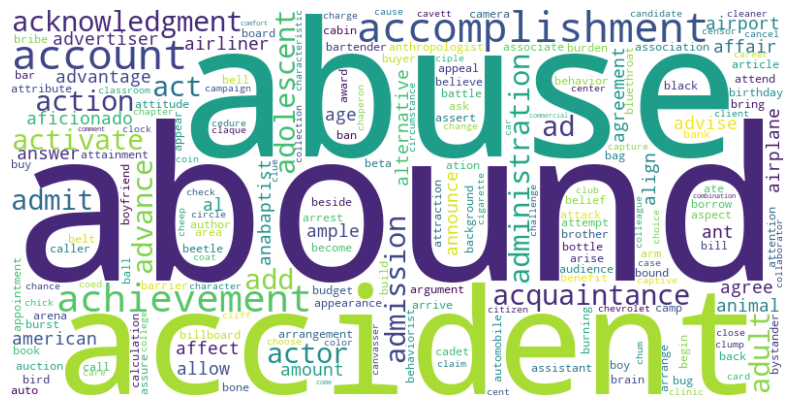

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join(df_bow.columns)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Las palabras mas grandes aparecen con mas frecuencia en nuestro texto: abuse, abound, accident, accomplishment y también achievement, acquaintance, admission, advance, activate, administration

EXERCICI 2
*Treu les stopwords i realitza stemming al teu conjunt de dades.

Proceso los datos. Saco los stopwords que no dan información y realizo el steaming que quita los sufijos de las palabras, del conjunto de datos

In [15]:
#StopWords

textos = df['                    INTRODUCTION'].tolist() 
stopwords_english = set(stopwords.words('english'))     #cargo los stopwords en ingles

#la funcion es la siguiente:
def eliminar_stopwords(texto):
    palabras = texto.split()  # Dividir el texto en palabras
    palabras_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords_english]
    return ' '.join(palabras_sin_stopwords)


In [16]:
#aplico la funcion al texto de la columna introduccion y veo el resultado
df['INTRODUCTION_sin_stopwords'] = df['                    INTRODUCTION'].apply(eliminar_stopwords)

print(df[['                    INTRODUCTION', 'INTRODUCTION_sin_stopwords']])

                                            INTRODUCTION  \
0      I can admit it freely now. All my life I’ve be...   
1      can recall, I’ve been an easy mark for the pit...   
2      raisers, and operators of one sort or another....   
3      people have had dishonorable motives. The othe...   
4      certain charitable agencies, for instance—have...   
...                                                  ...   
10775                      HarperCollins Publishers Inc.   
10776                                10 East 53rd Street   
10777                                 New York, NY 10022   
10778                 http://www.harpercollinsebooks.com   
10779                                                     

                              INTRODUCTION_sin_stopwords  
0                admit freely now. life I’ve patsy. long  
1         recall, I’ve easy mark pitches peddlers, fund-  
2             raisers, operators one sort another. True,  
3      people dishonorable motives. others—

Se han sacado palabras como 'the', 'and', 'is', 'of', 'in', 'to', 'it'. Son palabras que  que no aportan significado sustancial al contenido del texto. El objetivo es centrarse en las palabras clave que llevan el significado principal del texto

Realizamos un proceso de stemming para reducir las palabras a su raiz o base eliminando los sufijos. Con ello agrupamos las variaciones de palabras similares y puede facilitar el análisis. Ejemplo: running se reduce a run

In [17]:
#Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()       #inicializo el stemmer

def stemming(texto):            #función stemming para el texto
    palabras = texto.split()     #Dividir el texto en palabras
    palabras_stemmed = [stemmer.stem(palabra) for palabra in palabras if palabra.lower() not in stopwords_english]
    return ' '.join(palabras_stemmed)

df['INTRODUCTION_stemmed_sin_stopwords'] = df['INTRODUCTION_sin_stopwords'].apply(stemming)
print(df[['INTRODUCTION_sin_stopwords', 'INTRODUCTION_stemmed_sin_stopwords']])


                              INTRODUCTION_sin_stopwords  \
0                admit freely now. life I’ve patsy. long   
1         recall, I’ve easy mark pitches peddlers, fund-   
2             raisers, operators one sort another. True,   
3      people dishonorable motives. others—representa...   
4      certain charitable agencies, instance—have bes...   
...                                                  ...   
10775                      HarperCollins Publishers Inc.   
10776                                10 East 53rd Street   
10777                                 New York, NY 10022   
10778                 http://www.harpercollinsebooks.com   
10779                                                      

                      INTRODUCTION_stemmed_sin_stopwords  
0                 admit freeli now. life i’v patsy. long  
1            recall, i’v easi mark pitch peddlers, fund-  
2                  raisers, oper one sort another. true,  
3                  peopl dishonor motives. 

EXERCICI 3
*Realitza sentiment analysis al teu conjunt de dades.
Se realiza el análisis de sentimiento de TextBlod. Asignará una puntuación: positiva, negativa o neutra, a cada texto
Siendo un valor en negativo un sentimiento negativo y un valor en positivo, un sentimiento positivo. Cuanto mas se acerca a 0 mas neutro es el sentimiento

Voy a limpiar el texto de signos de puntuación y numeros. 

In [29]:
import re


def limpiar_texto(texto):
  
    texto_sin_numeros = re.sub(r'\d+', '', texto)   #elimino numeros
    
    texto_limpio = re.sub(r'[^\w\s]', '', texto_sin_numeros)    #elimino signos de puntuación
    
    return texto_limpio

df['INTRODUCTION_limpia'] = df['INTRODUCTION_stemmed_sin_stopwords'].apply(limpiar_texto) #creo nueva columna

print(df[['INTRODUCTION_stemmed_sin_stopwords', 'INTRODUCTION_limpia']].head()) #muestro df con la nueva columna

                  INTRODUCTION_stemmed_sin_stopwords  \
0             admit freeli now. life i’v patsy. long   
1        recall, i’v easi mark pitch peddlers, fund-   
2              raisers, oper one sort another. true,   
3              peopl dishonor motives. others—repres   
4  certain charit agencies, instance—hav best int...   

                                 INTRODUCTION_limpia  
0                admit freeli now life iv patsy long  
1            recall iv easi mark pitch peddlers fund  
2                 raisers oper one sort another true  
3                peopl dishonor motives othersrepres  
4  certain charit agencies instancehav best inten...  


Voy a dividir el texto en oraciones para poder hacer mejor el análisis de sentimiento

In [41]:

import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')              #descargo el paquete punkt

def tokenizar_por_frases(texto):
    oraciones = sent_tokenize(texto)
    return oraciones

df['INTRODUCTION_tokenizada_frases'] = df['INTRODUCTION_limpia'].apply(tokenizar_por_frases)

print(df[['INTRODUCTION_limpia', 'INTRODUCTION_tokenizada_frases']].head())     #veo la tokanización



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\client277192\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                 INTRODUCTION_limpia  \
0                admit freeli now life iv patsy long   
1            recall iv easi mark pitch peddlers fund   
2                 raisers oper one sort another true   
3                peopl dishonor motives othersrepres   
4  certain charit agencies instancehav best inten...   

                      INTRODUCTION_tokenizada_frases  
0              [admit freeli now life iv patsy long]  
1          [recall iv easi mark pitch peddlers fund]  
2               [raisers oper one sort another true]  
3              [peopl dishonor motives othersrepres]  
4  [certain charit agencies instancehav best inte...  


Realizo el análisis de sentimiento utilizando TextBlob

In [24]:
from textblob import TextBlob

In [42]:
textos = df['INTRODUCTION_tokenizada_frases'].tolist() 

def analisis_sentimiento(oraciones):
    sentimientos = []
    for oracion in oraciones:
        analysis = TextBlob(oracion)
        sentimientos.append(analysis.sentiment.polarity)
    return sentimientos

In [51]:
df['Sentimiento'] = df['INTRODUCTION_tokenizada_frases'].apply(analisis_sentimiento)    #aplico la función a la columna
print(df[['INTRODUCTION_tokenizada_frases' , 'Sentimiento']].head(50))


                       INTRODUCTION_tokenizada_frases              Sentimiento
0               [admit freeli now life iv patsy long]                  [-0.05]
1           [recall iv easi mark pitch peddlers fund]                    [0.0]
2                [raisers oper one sort another true]                   [0.35]
3               [peopl dishonor motives othersrepres]                    [0.0]
4   [certain charit agencies instancehav best inte...     [0.6071428571428571]
5      [matter person disquiet frequency alway found]                    [0.0]
6           [possess unwant magazin subscript ticket]                    [0.0]
7        [sanit workers ball probabl longstand statu]                    [0.0]
8          [sucker account interest studi compliance]                   [-0.3]
9        [factor caus one person say ye anoth person]                    [0.0]
10                 [techniqu effect use factor bring]                    [0.0]
11      [compliance wonder request state certain way

Al ser el texto muy largo, voy a sumar las frases positivas, negativas y neutrales para hacerme una idea del sentimiento general del texto

In [49]:
df['Num_Positivas_por_oracion'] = df['Sentimiento'].apply(lambda x: sum(p > 0 for p in x))
df['Num_Negativas_por_oracion'] = df['Sentimiento'].apply(lambda x: sum(p < 0 for p in x))
df['Num_Neutrales_por_oracion'] = df['Sentimiento'].apply(lambda x: sum(p == 0 for p in x))

# Contar frases positivas, negativas y neutrales en todo el DataFrame
num_positivas_total = df['Num_Positivas_por_oracion'].sum()
num_negativas_total = df['Num_Negativas_por_oracion'].sum()
num_neutrales_total = df['Num_Neutrales_por_oracion'].sum()

# Imprimir resultados
print("Frases Positivas (Total):", num_positivas_total)
print("Frases Negativas (Total):", num_negativas_total)
print("Frases Neutrales (Total):", num_neutrales_total)

Frases Positivas (Total): 2357
Frases Negativas (Total): 1050
Frases Neutrales (Total): 7300


Vemos que el texto tiene un sentimiento general entre neutral y positivo

El modelo si es lo suficientemente bueno para analizar el texto. A la frase: 'differ fashion successful' le ha puesto un sentimiento positivo de 0,75 y a la frase: 'sucker account interest studi compliance' un sentimiento negativo de -0,3